In [24]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
path = 'dest_arrange2/data_log(-872586238)2.json'

In [79]:
records = pd.read_json(path)

In [80]:
records.head(10)

,time_start,source_ip,dest_ip,protocol_n,STRTITLE,source_mac,dest_mac,pkt_size
0,2019/08/13 오후 3:04:32,-757408879,-874088599,6,xmas scan,C0.67.AF.4A.A8.80,50.3D.E5.FF.2C.80,148
1,2019/08/13 오후 3:04:32,-757408879,-874088599,6,xmas scan,C0.67.AF.4A.A8.80,50.3D.E5.FF.2C.80,148
2,2019/08/13 오후 3:04:32,-757408879,-874088599,6,tcp null scan,C0.67.AF.4A.A8.80,50.3D.E5.FF.2C.80,148
3,2019/08/13 오후 3:04:32,-757408875,-874088599,6,xmas scan,C0.67.AF.4A.A8.80,50.3D.E5.FF.2C.80,148
4,2019/08/13 오후 3:04:32,-757408879,-874088599,6,tcp null scan,C0.67.AF.4A.A8.80,50.3D.E5.FF.2C.80,148


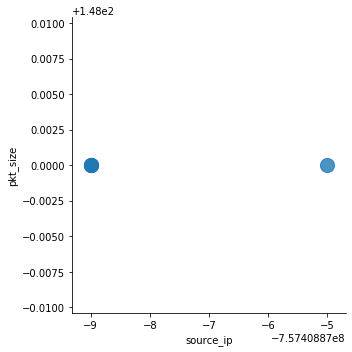

In [82]:
sns.lmplot('source_ip', 'pkt_size', data = records, fit_reg = False, scatter_kws={"s":200})

In [83]:
points = records.values

In [86]:
[[r[1],r[2], r[3]] for r in records]

[['i', 'm', 'e'],
 ['o', 'u', 'r'],
 ['e', 's', 't'],
 ['r', 'o', 't'],
 ['T', 'R', 'T'],
 ['o', 'u', 'r'],
 ['e', 's', 't'],
 ['k', 't', '_']]

In [93]:
print(records)

              time_start  source_ip    dest_ip  protocol_n       STRTITLE  \
0  2019/08/13 오후 3:04:32 -757408879 -874088599           6      xmas scan   
1  2019/08/13 오후 3:04:32 -757408879 -874088599           6      xmas scan   
2  2019/08/13 오후 3:04:32 -757408879 -874088599           6  tcp null scan   
3  2019/08/13 오후 3:04:32 -757408875 -874088599           6      xmas scan   
4  2019/08/13 오후 3:04:32 -757408879 -874088599           6  tcp null scan   

          source_mac           dest_mac  pkt_size  
0  C0.67.AF.4A.A8.80  50.3D.E5.FF.2C.80       148  
1  C0.67.AF.4A.A8.80  50.3D.E5.FF.2C.80       148  
2  C0.67.AF.4A.A8.80  50.3D.E5.FF.2C.80       148  
3  C0.67.AF.4A.A8.80  50.3D.E5.FF.2C.80       148  
4  C0.67.AF.4A.A8.80  50.3D.E5.FF.2C.80       148  
